In [2]:
# Import libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import ttest_ind

In [4]:
#read in the datasource
pf = pd.read_csv('Metro_median_sale_price_uc_sfr_month.csv')

In [6]:
pf.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024
0,102001,0,United States,country,NaN,168900.0,174725.0,175000.0,178300.0,183500.0,...,349500.0,339711.0,335000.0,329938.0,325000.0,325000.0,338750.0,350000.0,358000.0,369000
1,394913,1,"New York, NY",msa,NY,400000.0,390900.0,399000.0,400000.0,400000.0,...,630000.0,605000.0,600000.0,600000.0,600000.0,600000.0,595000.0,600000.0,620000.0,647000
2,753899,2,"Los Angeles, CA",msa,CA,500000.0,485000.0,487000.0,470000.0,455000.0,...,940000.0,920000.0,910000.0,925000.0,890000.0,885000.0,940000.0,945000.0,975000.0,1000000
3,394463,3,"Chicago, IL",msa,IL,215000.0,222000.0,223000.0,230000.0,239000.0,...,315000.0,300000.0,290000.0,290000.0,285000.0,285000.0,290000.0,309750.0,320000.0,330000
4,394514,4,"Dallas, TX",msa,TX,137900.0,146000.0,144900.0,150000.0,155500.0,...,390000.0,382000.0,380000.0,375000.0,370000.0,370000.0,381595.0,395000.0,400000.0,406000


In [8]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Columns: 201 entries, RegionID to 5/31/2024
dtypes: float64(195), int64(3), object(3)
memory usage: 1.2+ MB


In [10]:
pf.describe()

,RegionID,SizeRank,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,...,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024
count,757.000000,757.000000,454.000000,455.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,6.560000e+02,6.570000e+02,6.580000e+02,6.590000e+02,6.580000e+02,6.600000e+02,6.820000e+02,7.210000e+02,7.480000e+02,7.570000e+02
mean,417981.607662,401.770145,165417.140969,166264.830769,165462.842105,168213.550439,170280.381579,167577.344298,164103.958333,157428.710526,...,3.006031e+05,2.986183e+05,2.944128e+05,2.912261e+05,2.864512e+05,2.845692e+05,2.853702e+05,2.919178e+05,2.988891e+05,3.053328e+05
std,92910.184425,242.843734,97340.903056,95360.003802,92900.826657,89303.364160,87233.541763,86989.158060,84939.544653,79277.272511,...,1.869531e+05,1.839374e+05,1.853028e+05,1.850718e+05,1.803560e+05,1.840887e+05,1.820373e+05,1.832201e+05,1.929513e+05,1.838808e+05
min,102001.000000,0.000000,47000.000000,47550.000000,47750.000000,58000.000000,59000.000000,55500.000000,37485.000000,49450.000000,...,5.500000e+04,7.000000e+04,6.850000e+04,5.000000e+04,4.500000e+04,4.900000e+04,5.500000e+04,6.400000e+04,7.900000e+04,5.650000e+04
25%,394545.000000,192.000000,105243.750000,105537.500000,104863.250000,112650.000000,115995.500000,115000.000000,110187.500000,105375.000000,...,1.887125e+05,1.883000e+05,1.810500e+05,1.823750e+05,1.751125e+05,1.728155e+05,1.750000e+05,1.800000e+05,1.815352e+05,1.910000e+05
50%,394807.000000,390.000000,138262.500000,140000.000000,140125.000000,144850.000000,148588.500000,145000.000000,141000.000000,137538.500000,...,2.500000e+05,2.471410e+05,2.444715e+05,2.399000e+05,2.350000e+05,2.350000e+05,2.399250e+05,2.430000e+05,2.485000e+05,2.580000e+05
75%,395055.000000,602.000000,197062.500000,199450.000000,195000.000000,199000.000000,200300.000000,195375.000000,189887.500000,182000.000000,...,3.575000e+05,3.474500e+05,3.482500e+05,3.339750e+05,3.350000e+05,3.300000e+05,3.300000e+05,3.429050e+05,3.492500e+05,3.600000e+05
max,845169.000000,922.000000,706000.000000,715000.000000,695000.000000,695000.000000,650000.000000,626250.000000,668500.000000,537500.000000,...,1.600000e+06,1.737500e+06,1.675000e+06,1.750000e+06,1.510000e+06,1.499500e+06,1.680000e+06,1.675000e+06,1.800000e+06,1.742000e+06


In [12]:
# drill down to only Utah stats
pf_State = pf[pf['StateName'] == 'UT']

In [14]:
pf_State.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024
47,395053,48,"Salt Lake City, UT",msa,UT,232000.0,230000.0,239900.0,243000.0,237750.0,...,531625.0,519600.0,530000.0,520000.0,505000.0,510000.0,544595.0,540000.0,552750.0,557500
86,394931,87,"Ogden, UT",msa,UT,188900.0,182336.0,187000.0,185000.0,187200.0,...,468000.0,455000.0,455000.0,468596.0,439650.0,456024.0,450000.0,459000.0,460000.0,480000
91,395006,92,"Provo, UT",msa,UT,217758.0,224400.0,229900.0,220000.0,226500.0,...,515000.0,531128.0,494600.0,507884.0,495033.0,502627.0,507682.0,510000.0,527500.0,545000
243,395119,249,"St. George, UT",msa,UT,300000.0,272500.0,251468.0,263471.0,261485.0,...,480000.0,543281.0,480809.0,536907.0,497765.0,530000.0,480000.0,496000.0,540000.0,510042
293,394800,301,"Logan, UT",msa,UT,162500.0,157500.0,164950.0,166750.0,175000.0,...,404950.0,397495.0,390000.0,439950.0,410000.0,375000.0,433000.0,427500.0,414050.0,426782
447,394674,467,"Heber, UT",msa,UT,585000.0,545000.0,584202.0,464000.0,428391.0,...,1073182.0,1066072.0,1110000.0,1210726.0,970000.0,1050000.0,1020000.0,1150000.0,1125000.0,950000
530,394446,562,"Cedar City, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,464151.0,316500.0,392498.0,393137
697,395187,760,"Vernal, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,310000.0,300000.0,335810.0,315604.0,330000.0,365000.0,273450.0,333524.0,310516.0,328992
754,395003,912,"Price, UT",msa,UT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189900.0,233931.0,262000


In [16]:
#verify if there are any null values in the data
null_rows = pf_State[pf_State.isna().any(axis=1)]

In [18]:
null_rows.count()

RegionID      3
SizeRank      3
RegionName    3
RegionType    3
StateName     3
             ..
1/31/2024     1
2/29/2024     2
3/31/2024     3
4/30/2024     3
5/31/2024     3
Length: 201, dtype: int64

In [20]:
#There are three cities in Utah that have missing data. Select only those that have data available, which are also the largest cities
pf_city = pf_State[pf_State['RegionName'].isin(['Salt Lake City, UT', 'Ogden, UT','Provo, UT','St. George, UT','Logan, UT'])]

In [22]:
pf_city.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,...,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024
47,395053,48,"Salt Lake City, UT",msa,UT,232000.0,230000.0,239900.0,243000.0,237750.0,...,531625.0,519600.0,530000.0,520000.0,505000.0,510000.0,544595.0,540000.0,552750.0,557500
86,394931,87,"Ogden, UT",msa,UT,188900.0,182336.0,187000.0,185000.0,187200.0,...,468000.0,455000.0,455000.0,468596.0,439650.0,456024.0,450000.0,459000.0,460000.0,480000
91,395006,92,"Provo, UT",msa,UT,217758.0,224400.0,229900.0,220000.0,226500.0,...,515000.0,531128.0,494600.0,507884.0,495033.0,502627.0,507682.0,510000.0,527500.0,545000
243,395119,249,"St. George, UT",msa,UT,300000.0,272500.0,251468.0,263471.0,261485.0,...,480000.0,543281.0,480809.0,536907.0,497765.0,530000.0,480000.0,496000.0,540000.0,510042
293,394800,301,"Logan, UT",msa,UT,162500.0,157500.0,164950.0,166750.0,175000.0,...,404950.0,397495.0,390000.0,439950.0,410000.0,375000.0,433000.0,427500.0,414050.0,426782


In [24]:
null_rows_updated = pf_city[pf_city.isna().any(axis=1)]

In [26]:
null_rows_updated.count()

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     0
             ..
1/31/2024     0
2/29/2024     0
3/31/2024     0
4/30/2024     0
5/31/2024     0
Length: 201, dtype: int64

In [28]:
# transpose columns to use for graphing and updating dates to datetime
convert_date = pf_city.columns[5:]  #
pf_utah_clean = pf_city.melt(id_vars=['RegionName'], value_vars=convert_date, var_name='Date', value_name='MedianSalePrice')

In [30]:
pf_utah_clean.head()

,RegionName,Date,MedianSalePrice
0,"Salt Lake City, UT",2/29/2008,232000.0
1,"Ogden, UT",2/29/2008,188900.0
2,"Provo, UT",2/29/2008,217758.0
3,"St. George, UT",2/29/2008,300000.0
4,"Logan, UT",2/29/2008,162500.0


In [32]:
# Convert Date column to datetime format
pf_utah_clean['Date'] = pd.to_datetime(pf_utah_clean['Date'])

In [34]:
# Change Median Sales Price from a float to an integer
pf_utah_clean['MedianSalePrice'] = pf_utah_clean['MedianSalePrice'].astype(int)

In [36]:
pf_utah_clean.head()

,RegionName,Date,MedianSalePrice
0,"Salt Lake City, UT",2008-02-29,232000
1,"Ogden, UT",2008-02-29,188900
2,"Provo, UT",2008-02-29,217758
3,"St. George, UT",2008-02-29,300000
4,"Logan, UT",2008-02-29,162500


In [38]:
#select the last 10 years of data from the dataset
pf_utah_clean_2014 = pf_utah_clean[pf_utah_clean['Date'] > '2014-05-31']

In [40]:
pf_utah_clean_2014.head()

,RegionName,Date,MedianSalePrice
380,"Salt Lake City, UT",2014-06-30,239000
381,"Ogden, UT",2014-06-30,190000
382,"Provo, UT",2014-06-30,230000
383,"St. George, UT",2014-06-30,216000
384,"Logan, UT",2014-06-30,165500


In [42]:
# Verify that dataset is cleaned
pf_utah_clean_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 380 to 979
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   RegionName       600 non-null    object        
 1   Date             600 non-null    datetime64[ns]
 2   MedianSalePrice  600 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 16.4+ KB


In [44]:
# Update clean file to a dataframe
pf_utah_clean_2014 = pd.DataFrame(pf_utah_clean_2014)

C:\Users\jdeea\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jdeea\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\jdeea\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jdeea\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\jdeea\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\jdeea\anaconda3\Lib\site-

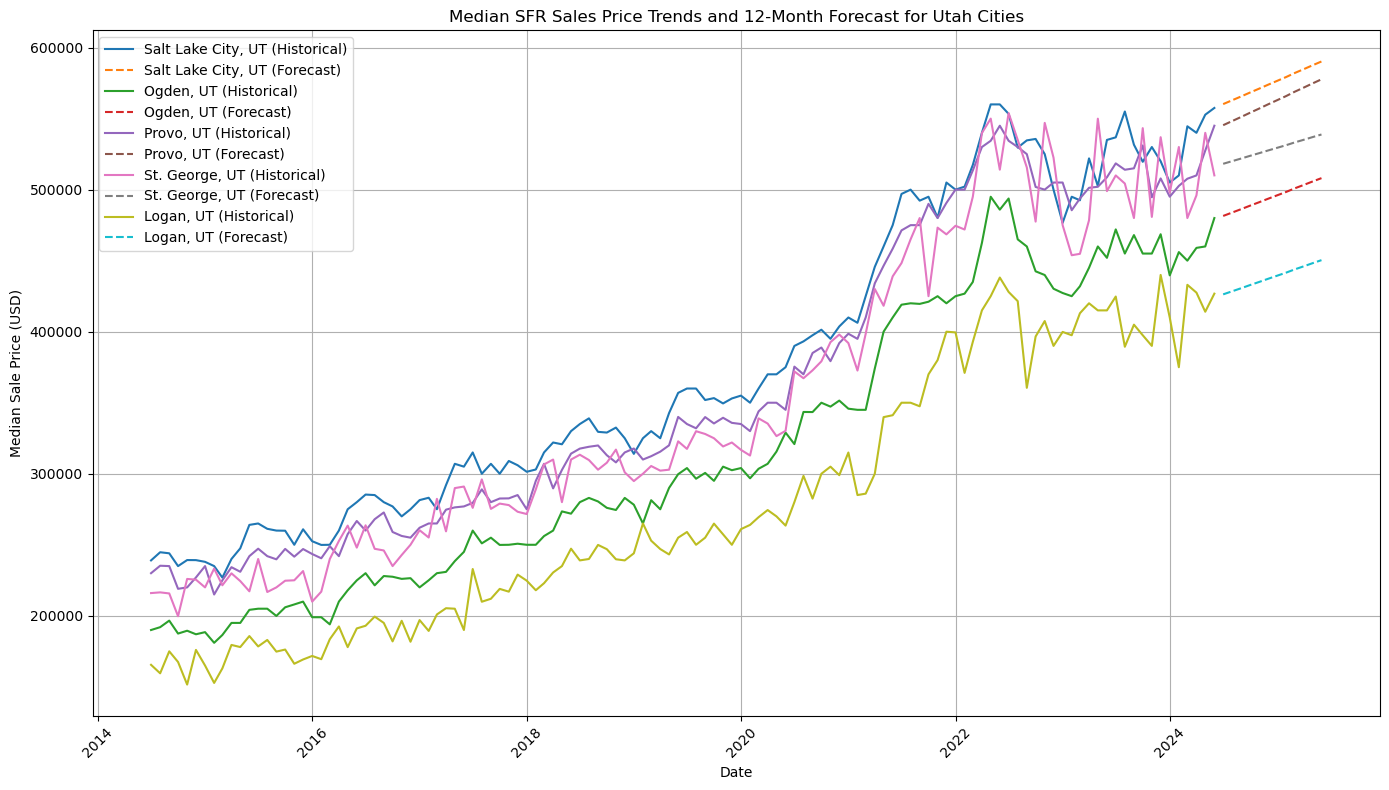

In [46]:
#Create plots for historical and future median sales values
# Forecasting for each city in Utah
city_forecasts = {}

plt.figure(figsize=(14, 8))

for region in pf_utah_clean_2014['RegionName'].unique():
    # gather the region, date, and median sales price
    region_data = pf_utah_clean_2014[pf_utah_clean_2014['RegionName'] == region].set_index('Date')['MedianSalePrice']
    
    # Fit an Exponential Smoothing model for forecasting
    model = ExponentialSmoothing(region_data, trend='add', seasonal=None, seasonal_periods=None)
    fit = model.fit()
    
    # Forecast future against historical
    forecast = fit.forecast(12)
    
    # save for later
    city_forecasts[region] = forecast
    
    # Historical plot
    plt.plot(region_data.index, region_data.values, linestyle='-', label=f'{region} (Historical)')
    
    # Forecasted plot
    plt.plot(forecast.index, forecast.values, linestyle='--', label=f'{region} (Forecast)')

plt.title('Median SFR Sales Price Trends and 12-Month Forecast for Utah Cities')
plt.xlabel('Date')
plt.ylabel('Median Sale Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("Median SFR Sales Price Trends and 12-Month Forecast for Utah Cities.pdf")


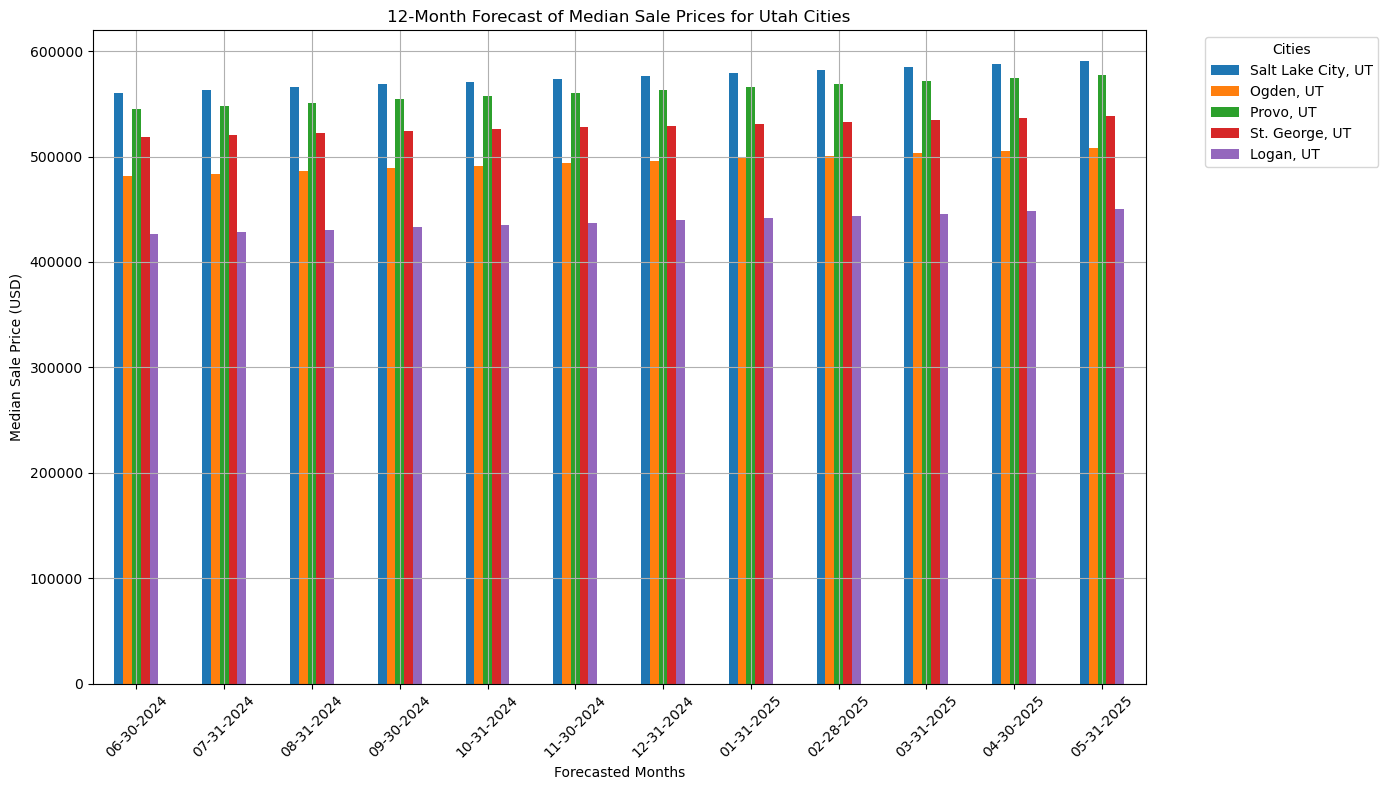

In [48]:
# Create dataframe of the forecasted data
forecast_pf = pd.DataFrame(city_forecasts)

axis = forecast_pf.plot(kind='bar', figsize=(14, 8))

axis.set_xticklabels(forecast_pf.index.strftime('%m-%d-%Y'))

plt.title('12-Month Forecast of Median Sale Prices for Utah Cities')
plt.xlabel('Forecasted Months')
plt.ylabel('Median Sale Price (USD)')
plt.legend(title='Cities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig("12-Month Forecast of Median Sale Prices for Utah Cities.pdf")

In [50]:
# Datasource of future median sales values
forecast_pf

,"Salt Lake City, UT","Ogden, UT","Provo, UT","St. George, UT","Logan, UT"
2024-06-30,560216.025955,481484.323022,545363.166375,518192.684611,426280.613895
2024-07-31,562942.676109,483903.952492,548298.402816,520067.536319,428470.426020
2024-08-31,565669.326262,486323.581962,551233.639257,521942.388028,430660.238145
2024-09-30,568395.976416,488743.211431,554168.875698,523817.239737,432850.050270
2024-10-31,571122.626569,491162.840901,557104.112139,525692.091445,435039.862396
2024-11-30,573849.276723,493582.470371,560039.348580,527566.943154,437229.674521
2024-12-31,576575.926876,496002.099841,562974.585021,529441.794863,439419.486646
2025-01-31,579302.577030,498421.729311,565909.821462,531316.646571,441609.298771
2025-02-28,582029.227183,500841.358780,568845.057903,533191.498280,443799.110897
2025-03-31,584755.877337,503260.988250,571780.294344,535066.349989,445988.923022


In [52]:
# Verify data is clean
forecast_pf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2024-06-30 to 2025-05-31
Freq: ME
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salt Lake City, UT  12 non-null     float64
 1   Ogden, UT           12 non-null     float64
 2   Provo, UT           12 non-null     float64
 3   St. George, UT      12 non-null     float64
 4   Logan, UT           12 non-null     float64
dtypes: float64(5)
memory usage: 576.0 bytes


In [54]:
# Create Dataframe of forecasted cities and median sales prices
forecast_pf_updated = pd.DataFrame(forecast_pf, columns=['Salt Lake City, UT','Ogden, UT','Provo, UT','St. George, UT','Logan, UT'])

In [56]:
forecast_pf_updated

,"Salt Lake City, UT","Ogden, UT","Provo, UT","St. George, UT","Logan, UT"
2024-06-30,560216.025955,481484.323022,545363.166375,518192.684611,426280.613895
2024-07-31,562942.676109,483903.952492,548298.402816,520067.536319,428470.426020
2024-08-31,565669.326262,486323.581962,551233.639257,521942.388028,430660.238145
2024-09-30,568395.976416,488743.211431,554168.875698,523817.239737,432850.050270
2024-10-31,571122.626569,491162.840901,557104.112139,525692.091445,435039.862396
2024-11-30,573849.276723,493582.470371,560039.348580,527566.943154,437229.674521
2024-12-31,576575.926876,496002.099841,562974.585021,529441.794863,439419.486646
2025-01-31,579302.577030,498421.729311,565909.821462,531316.646571,441609.298771
2025-02-28,582029.227183,500841.358780,568845.057903,533191.498280,443799.110897
2025-03-31,584755.877337,503260.988250,571780.294344,535066.349989,445988.923022


In [58]:
#convert float to int
forecast_pf_final = forecast_pf_updated.astype({"Salt Lake City, UT": 'int', "Ogden, UT": 'int',  "Provo, UT": 'int', "St. George, UT": 'int',"Logan, UT": 'int',})

In [60]:
forecast_pf_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2024-06-30 to 2025-05-31
Freq: ME
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Salt Lake City, UT  12 non-null     int32
 1   Ogden, UT           12 non-null     int32
 2   Provo, UT           12 non-null     int32
 3   St. George, UT      12 non-null     int32
 4   Logan, UT           12 non-null     int32
dtypes: int32(5)
memory usage: 336.0 bytes


In [62]:
# view dataframe with forecasted median values by city
forecast_pf_final

,"Salt Lake City, UT","Ogden, UT","Provo, UT","St. George, UT","Logan, UT"
2024-06-30,560216,481484,545363,518192,426280
2024-07-31,562942,483903,548298,520067,428470
2024-08-31,565669,486323,551233,521942,430660
2024-09-30,568395,488743,554168,523817,432850
2024-10-31,571122,491162,557104,525692,435039
2024-11-30,573849,493582,560039,527566,437229
2024-12-31,576575,496002,562974,529441,439419
2025-01-31,579302,498421,565909,531316,441609
2025-02-28,582029,500841,568845,533191,443799
2025-03-31,584755,503260,571780,535066,445988


In [64]:
# Form null hypothesis test. Create two separate hypothesis for testing
def ttest(city_info, city):
    first_selection = city_info[(city_info['Date'] >= '2014-01-01') & (city_info['Date'] <= '2016-12-31')]['MedianSalePrice']
    second_selection = city_info[(city_info['Date'] >= '2022-01-01') & (city_info['Date'] <= '2024-12-31')]['MedianSalePrice']
    t_stat, p_value = ttest_ind(first_selection, second_selection, nan_policy='omit')
    return city, t_stat, p_value

cities = ['Salt Lake City, UT', 'Ogden, UT', 'Provo, UT', 'St. George, UT', 'Logan, UT']

city_results = []

for city in cities:
    city_info = pf_utah_clean_2014[pf_utah_clean_2014['RegionName'] == city]
    city_results.append(ttest(city_info, city))

city_results_pf = pd.DataFrame(city_results, columns=['City', 't-stat', 'p-value'])

city_results_pf


,City,t-stat,p-value
0,"Salt Lake City, UT",-52.905435,8.724461e-51
1,"Ogden, UT",-56.618599,1.836810e-52
2,"Provo, UT",-67.860906,5.872443e-57
3,"St. George, UT",-44.475863,1.616742e-46
4,"Logan, UT",-53.742636,3.572979e-51


In [66]:
# Alpha threshold
alpha = 0.05

city_results_pf['Reject Null Hypothesis'] = city_results_pf['p-value'] < alpha

city_results_pf

,City,t-stat,p-value,Reject Null Hypothesis
0,"Salt Lake City, UT",-52.905435,8.724461e-51,True
1,"Ogden, UT",-56.618599,1.836810e-52,True
2,"Provo, UT",-67.860906,5.872443e-57,True
3,"St. George, UT",-44.475863,1.616742e-46,True
4,"Logan, UT",-53.742636,3.572979e-51,True
